In [2]:
from pandas import *

#### String methods in pandas

In [2]:
'Hello'.lower()

'hello'

In [4]:
 data = read_table('http://bit.ly/chiporders')

In [5]:
data.shape

(4622, 5)

In [6]:
data.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [7]:
data.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [8]:
data.item_name.str.contains('Chicken')

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [9]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [14]:
data.choice_description.str.replace('[', '').str.replace(']','')

<ipython-input-14-166e243d8338>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.choice_description.str.replace('[', '').str.replace(']','')


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [15]:
data.choice_description.str.replace('[\[\]]','')

<ipython-input-15-1cca640eb56f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.choice_description.str.replace('[\[\]]','')


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

#### Changing data type in pandas Series

In [16]:
data2 = read_csv('http://bit.ly/drinksbycountry')
data2.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe


In [17]:
data2.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [20]:
type(data2)

pandas.core.frame.DataFrame

In [21]:
data2.shape

(193, 6)

In [29]:
data2['beer_servings'] = data2.beer_servings.astype(float)

In [30]:
data2.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [31]:
data2.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa


In [33]:
data.head(3)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39


In [34]:
data.item_price.str.replace('$','').astype(float).mean()

<ipython-input-34-4e8f167f6982>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.item_price.str.replace('$','').astype(float).mean()


7.464335785374397

#### Use of groupby in pandas

In [35]:
data2.beer_servings.mean()

106.16062176165804

In [37]:
data2.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [42]:
data2[data2.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [43]:
data2.groupby('continent').beer_servings.max()

continent
Africa           376.0
Asia             247.0
Europe           361.0
North America    285.0
Oceania          306.0
South America    333.0
Name: beer_servings, dtype: float64

In [45]:
data2.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.0,376.0,61.471698
Asia,44,0.0,247.0,37.045455
Europe,45,0.0,361.0,193.777778
North America,23,1.0,285.0,145.434783
Oceania,16,0.0,306.0,89.687500
South America,12,93.0,333.0,175.083333


In [46]:
data2.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [47]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

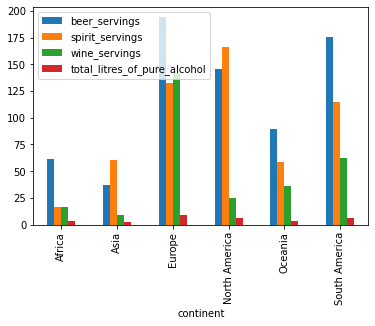

In [48]:
data2.groupby('continent').mean().plot(kind = 'bar')

In [3]:
movie = read_csv('http://bit.ly/imdbratings')
movie.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [51]:
movie.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [52]:
movie.shape

(979, 6)

In [53]:
type(movie)

pandas.core.frame.DataFrame

In [54]:
movie.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [55]:
movie.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [56]:
movie.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [57]:
movie.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [59]:
movie.genre.nunique()

16

In [60]:
movie.duration.mean()

120.97957099080695

In [61]:
movie.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [62]:
movie.duration.value_counts()

112    23
113    22
101    20
102    20
129    19
       ..
180     1
182     1
183     1
184     1
242     1
Name: duration, Length: 133, dtype: int64

<AxesSubplot:ylabel='Frequency'>

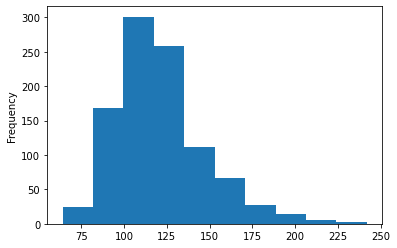

In [63]:
movie.duration.plot(kind = "hist")

In [64]:
movie.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [7]:
import pandas as pd

In [8]:
pd.crosstab(movie.genre,movie.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0
